In [1]:
import os
import sys
sys.path.append(os.pardir)

In [2]:
cd ..

/home/massquantity/Workspace/DNN_implementation


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("seaborn")

import random
import time
from DNN_implementation.data import cifar_data, mnist_2
from DNN_implementation.model import Network, Network_mini_batch
from DNN_implementation.train import train_DNN_minibatch
from DNN_implementation import Sgd, Momentum, NesterovMomentum, Adam
from DNN_implementation import Sigmoid, ReLU
from DNN_implementation.evaluate import evaluate_batch

In [4]:
def collect_metrics(X_train, y_train, num_epochs, optimizer, batch_size, network, X_test, y_test):
    best_loss = np.infty
    for epoch in range(1, num_epochs + 1):
        random_mask = np.random.choice(len(X_train), len(X_train), replace=False)
        X_train = X_train[random_mask]
        y_train = y_train[random_mask]

        for i in range(0, len(X_train), batch_size):
            X_batch = X_train[i: i + batch_size]
            y_batch = y_train[i: i + batch_size]
            grad_w, grad_b = network.backprop(X_batch, y_batch)
            optimizer.update(network.weights, network.biases, grad_w, grad_b)

        train_loss, train_accuracy = evaluate_batch(X_train, y_train, network)
        test_loss, test_accuracy = evaluate_batch(X_test, y_test, network)
        if test_loss < best_loss:
            best_loss = test_loss
            count = 0
        else:
            count += 1

        if count > 5:
            print("Early Stopping in epoch %d !!!" % epoch)
            break
    return train_accuracy, test_accuracy

In [5]:
def plot_learning_curve(model, optimizer, num_epochs, batch_size):
    train_accuracy, test_accuracy = [], []
    for m in range(1000, len(X_train) + 5, 5000):
        network = model
        train_acc, test_acc = collect_metrics(X_train[:m], y_train[:m], num_epochs, optimizer, 
                                              batch_size, network, X_test, y_test)
        del network
        train_accuracy.append(train_acc)
        test_accuracy.append(test_acc)
        print("dataset %d done" % m)
    
    return train_accuracy, test_accuracy

In [6]:
(X_train, y_train), (X_test, y_test) = mnist_2.load_data()
dnn = Network_mini_batch(sizes=[784, 50, 10], activation="relu", dropout_rate=0.0,
                             weight_initializer="he")
optimizer = Momentum(lr=1e-3, momentum=0.9, batch_size=128)

In [ ]:
%time train_accuracy, test_accuracy = plot_learning_curve(dnn, optimizer, 500, 128)

Early Stopping in epoch 384 !!!
dataset 1000 done
Early Stopping in epoch 324 !!!
dataset 6000 done


In [8]:
train_accuracy, test_accuracy

([0.676,
  0.8861666666666667,
  0.9145454545454546,
  0.9221875,
  0.9312380952380952,
  0.9403076923076923,
  0.9472903225806452,
  0.9532222222222222,
  0.9580487804878048,
  0.9618260869565217,
  0.9654313725490196,
  0.9690178571428572],
 [0.6314,
  0.8674,
  0.9001,
  0.9141,
  0.9262,
  0.9338,
  0.9411,
  0.9467,
  0.9508,
  0.9542,
  0.9577,
  0.9619])

Text(0,0.5,'accuracy')

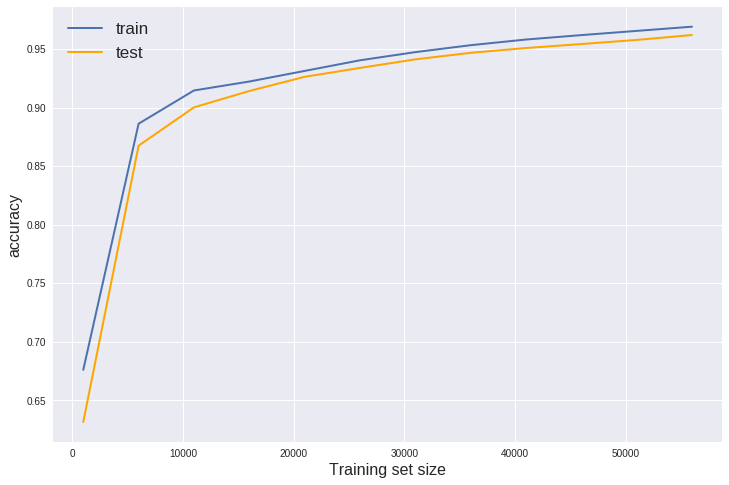

In [9]:
plt.figure(figsize=(12, 8))
plt.plot(range(1000, len(X_train) + 5, 5000), train_accuracy, linewidth=2, label="train")
plt.plot(range(1000, len(X_train) + 5, 5000), test_accuracy, color="orange", linewidth=2, label="test")
# plt.xtick_labels("3")
# xticks([]), yticks([])
plt.legend(loc="best", fontsize=17)
plt.xlabel("Training set size", fontsize=16)
plt.ylabel("accuracy", fontsize=16)